등산로를 조성하려고 한다. 등산로를 만들기 위한 부지는 N * N 크기를 가지고 있으며, 이곳에 최대한 긴 등산로를 만들 계획이다. 등산로 부지는 아래 [Fig. 1]과 같이 숫자가 표시된 지도로 주어지며, 각 숫자는 지형의 높이를 나타낸다.
 
<div>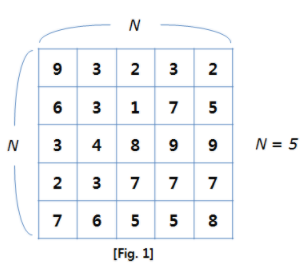</div>

등산로를 만드는 규칙은 다음과 같다.
   ① 등산로는 가장 높은 봉우리에서 시작해야 한다.
   ② 등산로는 산으로 올라갈 수 있도록 반드시 높은 지형에서 낮은 지형으로 가로 또는 세로 방향으로 연결이 되어야 한다.
       즉, 높이가 같은 곳 혹은 낮은 지형이나, 대각선 방향의 연결은 불가능하다.
   ③ 긴 등산로를 만들기 위해 딱 한 곳을 정해서 최대 K 깊이만큼 지형을 깎는 공사를 할 수 있다.

N * N 크기의 지도가 주어지고, 최대 공사 가능 깊이 K가 주어진다. 이때 만들 수 있는 가장 긴 등산로를 찾아 그 길이를 출력하는 프로그램을 작성하라.

[예시]
위 [Fig. 1]과 같이 N = 5인 지도가 주어진 경우를 살펴보자. 가장 높은 봉우리는 높이가 9로 표시된 세 군데이다. 이 세 곳에서 출발하는 가장 긴 등산로 중 하나는 아래 [Fig. 2]와 같고, 이 때 길이는 5가 된다.

<div>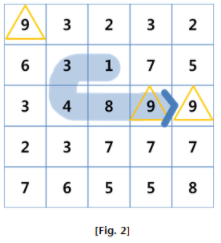</div>
 
만약 최대 공사 가능 깊이 K = 1로 주어질 경우, 아래 [Fig. 3]과 같이 빨간색 부분의 높이를 9에서 8로 깎으면 길이가 6인 등산로를 만들 수 있다. 이 예에서 만들 수 있는 가장 긴 등산로는 위와 같으며, 출력할 정답은 6이 된다.

<div>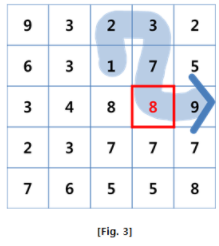</div>

[제약사항]
1. 시간 제한 : 최대 51개 테스트 케이스를 모두 통과하는 데 C/C++/Java 모두 3초
2. 지도의 한 변의 길이 N은 3 이상 8 이하의 정수이다. (3 ≤ N ≤ 8)
3. 최대 공사 가능 깊이 K는 1 이상 5 이하의 정수이다. (1 ≤ K ≤ 5)
4. 지도에 나타나는 지형의 높이는 1 이상 20 이하의 정수이다.
5. 지도에서 가장 높은 봉우리는 최대 5개이다.
6. 지형은 정수 단위로만 깎을 수 있다.
7. 필요한 경우 지형을 깎아 높이를 1보다 작게 만드는 것도 가능하다.

[입력]
입력의 맨 첫 줄에는 총 테스트 케이스의 개수 T가 주어지고, 그 다음 줄부터 T개의 테스트 케이스가 주어진다. 각 테스트 케이스의 첫 번째 줄에는 지도의 한 변의 길이 N, 최대 공사 가능 깊이 K가 차례로 주어진다. 그 다음 N개의 줄에는 N * N 크기의 지도 정보가 주어진다.

[출력]
테스트 케이스 개수만큼 T개의 줄에 각각의 테스트 케이스에 대한 답을 출력한다. 각 줄은 "#t"로 시작하고 공백을 하나 둔 다음 정답을 출력한다. (t는 1부터 시작하는 테스트 케이스의 번호이다) 출력해야 할 정답은 만들 수 있는 가장 긴 등산로의 길이이다.

## Success: global variable 조심하자! -> 항상 초기화 해주기

In [63]:
import sys

maps = [[0]*8 for _ in range(8)]
visited = [[0]*8 for _ in range(8)]
dirs = [[-1,0],[1,0],[0,-1],[0,1]]
heightest = 0
max_length = 0
N, K = 0, 0

class info:
    def __init__(self,i,j,height,use_k,curr_length):
        self.i = i
        self.j = j
        self.height = height
        self.use_k = use_k
        self.length = curr_length
    
def solution(curr_point):
    global max_length
    if max_length < curr_point.length:
        max_length = curr_point.length
    
    for d in dirs:
        next_i, next_j = curr_point.i+d[0], curr_point.j+d[1]
        if next_i >= N or next_i < 0 or next_j >= N or next_j < 0:
            continue
        if visited[next_i][next_j]:
            continue
            
        next_point = info(next_i, next_j, maps[next_i][next_j], curr_point.use_k, curr_point.length)
        
        if next_point.height < curr_point.height:
            visited[next_i][next_j] = 1
            next_point.length += 1
            
            solution(next_point)
            
            visited[next_i][next_j] = 0
        else:
            if (not curr_point.use_k) and  (next_point.height - K < curr_point.height):
                visited[next_i][next_j] = 1
                next_point.length += 1
                next_point.use_k = 1
                next_point.height = curr_point.height - 1
                
                solution(next_point)
                
                visited[next_i][next_j] = 0

    
if __name__=="__main__":
    global max_length
    sys.stdin = open("./1949_input.txt", "r")

    T = int(sys.stdin.readline().strip("\n"))

    for test_case in range(1,T+1):
        nk = sys.stdin.readline().strip("\n").split(" ")
        
        # 전역변수 초기화!
        N, K = int(nk[0]), int(nk[1])
        maps = [[0]*N for _ in range(N)]
        visit = [[0]*N for _ in range(N)]
        heightest = 0
        max_length = 0

        for i in range(N):
            row = sys.stdin.readline().strip("\n").split(" ")
            for j in range(N):
                maps[i][j] = int(row[j])
                if heightest < int(row[j]):
                    heightest = int(row[j])
        for i in range(N):
            for j in range(N):
                if maps[i][j] == heightest:
                    visited[i][j] = 1
                    start_point = info(i,j,heightest,0,1)
                    solution(start_point)
                    visited[i][j] = 0
        print(f"#{test_case} {max_length}")

#1 6
#2 3
#3 7
#4 4
#5 2
#6 12
#7 6
#8 7
#9 10
#10 19
